# Import Libraries

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sb             # for plotting
from scipy.stats import pearsonr # for correlation

# Read and check your dataset

In [2]:
# Load the data, pares the dates 
df = pd.read_csv('DataSets/day-bikesharing.csv', index_col='instant')
df.head(3) #display first 3 rows

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [3]:
df.shape #check the dimension

(731, 15)

In [4]:
#Save Deep Copy of the dataframe
DataDF =df.copy()

In [5]:
DataDF

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


# Exploratory Data Analysis

In [6]:
# generate descriptive statistics
# T is to transform the row and column
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896
hum,731.0,0.627894,0.142429,0.000000,0.520000,0.626667,0.730209,0.972500


In [7]:
df.isna().sum()
### there are no missing values

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

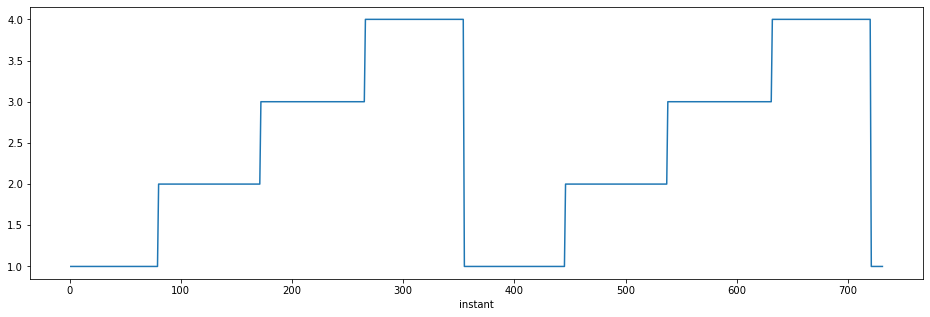

In [8]:
#plot the season feature
#season (1:winter, 2:spring, 3:summer, 4:fall)
plt.figure(figsize=(16,5))
DataDF['season'].plot()
plt.show()

In [9]:
# 1 is spring
df.season.value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

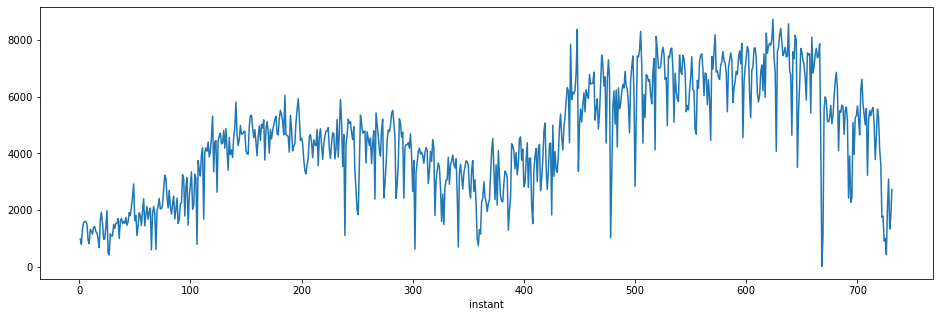

In [10]:
#plot the total bike rental counts for days in 2011 and 2012
plt.figure(figsize=(16,5))
df['cnt'].plot()
plt.show()

(21, 15)


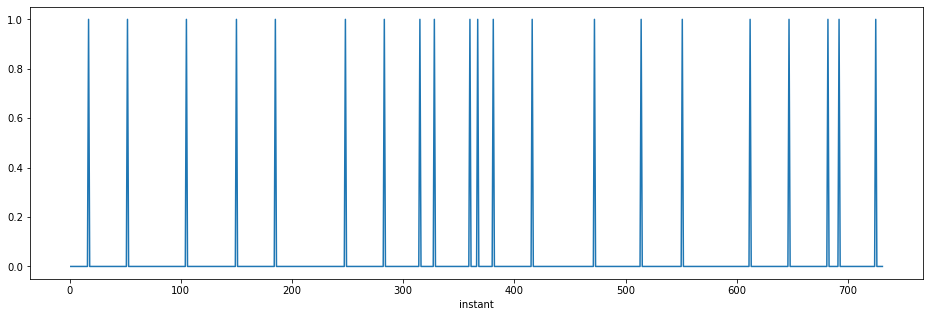

In [11]:
#plot the holidays
print(df[df.holiday == 1].shape)
plt.figure(figsize=(16,5))
df['holiday'].plot()
plt.show()

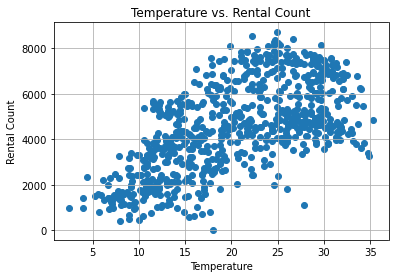

In [12]:
#plot a scatterplot of temperature vs. bike rental total counts
plt.scatter(x=df.temp*41,y=df["cnt"]) # denormalize temperature by multiplying 41
plt.grid(True)
plt.xlabel('Temperature')
plt.ylabel('Rental Count')
plt.title('Temperature vs. Rental Count')
plt.show()

Text(0.5, 1.0, 'Rental Count by Month')

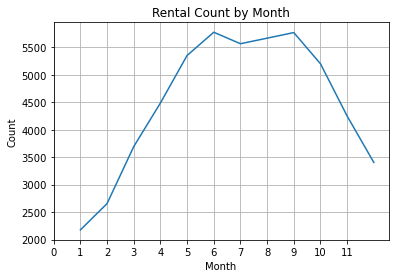

In [13]:
# from January to April, the demand is relatively low due in winter 
# The peak demand is at summer time (from May to October) and drops again.
group_month = df.groupby(['mnth'])
average_by_month = group_month['cnt'].mean()

plt.plot(average_by_month.index,average_by_month)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(np.arange(12))
plt.grid(True)
plt.title('Rental Count by Month')

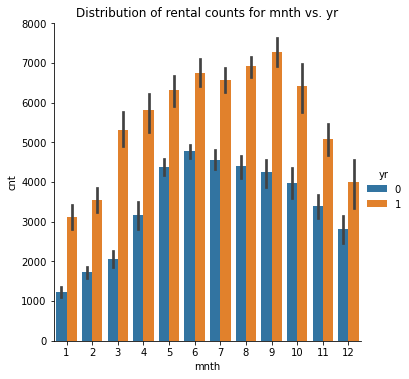

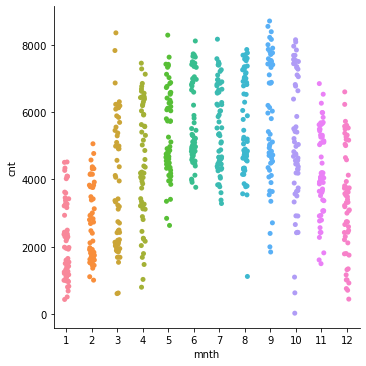

In [14]:
# barplot of x and y categorical features
x_var = 'mnth' #month
y_var = 'yr'   #year
set_title = 'Distribution of rental counts for ' + str(x_var) + ' vs. ' + str(y_var) #title in text
sb.catplot(kind = 'bar', data = df, y = 'cnt', x = x_var, hue = y_var)
plt.title(set_title)
plt.show()

# categorical scatterplot
sb.catplot(x="mnth", y="cnt", data=df)
plt.show()

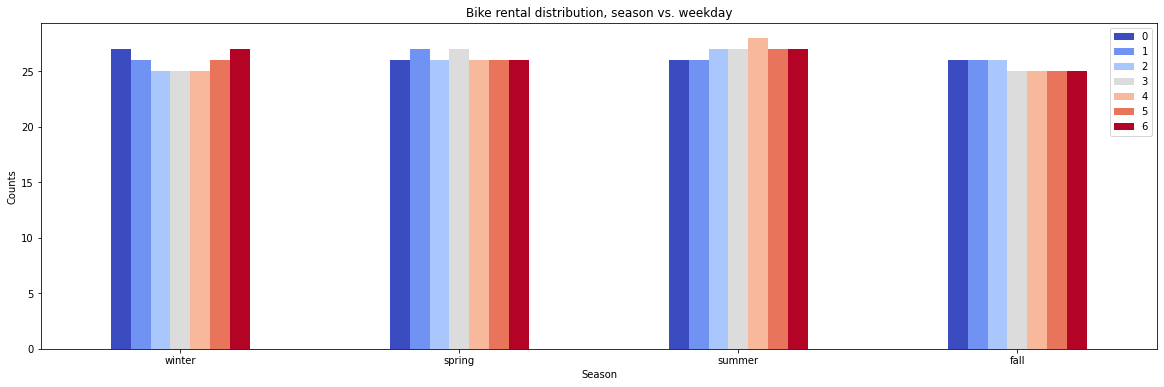

In [15]:
# compute a frequency of the season feature
pd.crosstab(df.season,df.weekday).plot(kind="bar",figsize=(20,6), cmap='coolwarm')
plt.title('Bike rental distribution, season vs. weekday')
plt.xlabel('Season')
plt.ylabel('Counts')
#season (1:winter, 2:spring, 3:summer, 4:fall)
plt.xticks([0, 1, 2, 3], ['winter', 'spring', 'summer', 'fall'], rotation=0)
plt.legend()
plt.show()

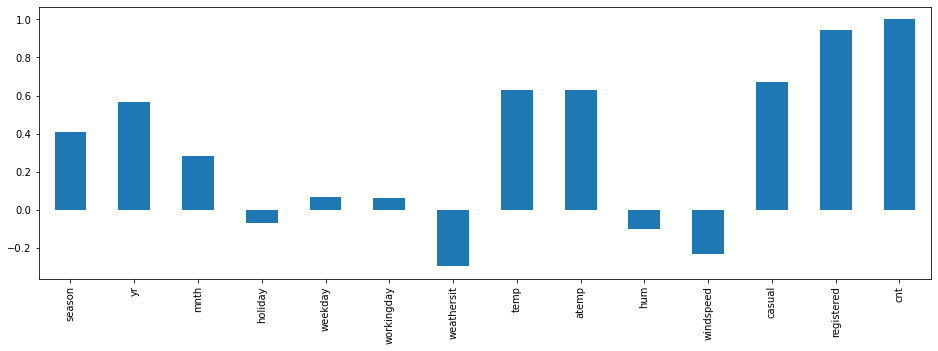

In [16]:
# correlation in a bar chart
plt.figure(figsize=(16,5))
df.corr()['cnt'].plot(kind='bar')
plt.show()

# Correlation matrix

Correlation matrix shows the linear relationship between variables.

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
temp          0.627494
yr            0.566710
season        0.406100
weathersit    0.297391
mnth          0.279977
windspeed     0.234545
hum           0.100659
holiday       0.068348
weekday       0.067443
workingday    0.061156
Name: cnt, dtype: float64


<AxesSubplot:>

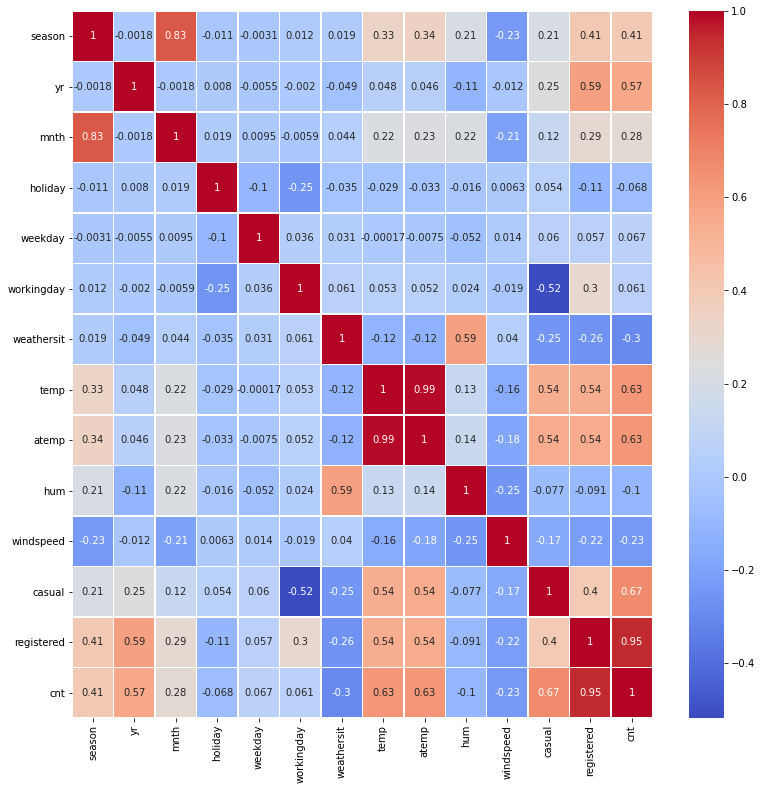

In [17]:
print(df.corr()["cnt"].abs().sort_values(ascending=False))
fig, ax = plt.subplots(figsize=(13,13)) # Sample figsize in inches
sb.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax, cmap="coolwarm")

In [18]:
df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# Prepare data with input and target features

In [19]:
# The target variable is 'count', count of total rental bikes including casual and registered.
# input: season        yr            mnth          holiday       weekday       workingday    
# input: weathersit    temp          atemp         hum           windspeed     
# target: casual + registered = cnt (pick the target)

#select the target total cnt, can also simply drop unused features
features = ['season', 'yr', 'mnth', 'holiday','weekday','workingday',
          'weathersit','temp','atemp','hum','windspeed', 'cnt'] 

In [20]:
# categorical variables (one hot encoding!!)
cat_var = ['season']
df = pd.get_dummies(df[features], columns = cat_var,  prefix_sep = '.')

In [21]:
# rename the column names
#season (1:winter, 2:spring, 3:summer, 4:fall)
df.rename(columns={'season.1': 'winter', 'season.2': 'spring', 'season.3': 'summer', 'season.4': 'fall'}, inplace=True)
df.head(3)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,winter,spring,summer,fall
instant,,,,,,,,,,,,,,,
1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,1,0,0,0
2,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,1,0,0,0
3,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,1,0,0,0


In [22]:
# Target feature to predict
to_predict = ['cnt']

# Input features to use
to_use_X = ['yr', 'mnth', 'holiday','weekday','workingday',
          'weathersit','temp','atemp','hum','windspeed',
          'spring','summer','fall','winter']

In [23]:
dfX = df[to_use_X]
dfX.head(2)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,spring,summer,fall,winter
instant,,,,,,,,,,,,,,
1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,0,0,0,1
2,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,0,0,0,1


# Normalize data

In [24]:
# Normalize data: Calculate mean and standard deviation
mu = df.mean(0)
sd = df.std(0)

# Normalize data
df_norm = (df - mu) / sd
df_norm.head(3)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,winter,spring,summer,fall
instant,,,,,,,,,,,,,,,
1,-1.000684,-1.599066,-0.171863,1.497783,-1.470218,1.109667,-0.826097,-0.679481,1.249316,-0.387626,-1.816709,1.741987,-0.579586,-0.588006,-0.566957
2,-1.000684,-1.599066,-0.171863,-1.495054,-1.470218,1.109667,-0.720601,-0.740146,0.478785,0.749089,-1.911691,1.741987,-0.579586,-0.588006,-0.566957
3,-1.000684,-1.599066,-0.171863,-0.996248,0.679241,-0.725551,-1.633538,-1.748570,-1.338358,0.746121,-1.628810,1.741987,-0.579586,-0.588006,-0.566957


In [25]:
# Check if there is any non available
df_norm.isna().any().sum()

0

In [26]:
# X and Y features
Y = np.asarray(df_norm[to_predict]).ravel()
Y_mu = np.asarray(mu[to_predict])
Y_sd = np.asarray(sd[to_predict])
# Note: Put the variables that would be used as inputs
X = np.asarray(df_norm[to_use_X])
#print(X)

In [27]:
#https://onestopdataanalysis.com/scatter-plot-python/
def simple_scatter_plot(x_data, y_data, output_filename, title_name, x_axis_label, y_axis_label):
    """Simple scatter plot.

    Args:
        x_data (list): List with x-axis data.
        y_data (list): List with y-axis data.
        output_filename (str): Path to output image in PNG format.
        title_name (int): Plot title.
        x_axis_label (str): X-axis Label.
        y_axis_label (str): Y-axis Label.

    """
    sb.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))

    plt.title(title_name)

    ax = sb.scatterplot(x=x_data, y=y_data)

    ax.set(xlabel=x_axis_label, ylabel=y_axis_label)

    #matplotlib.savefig(output_filename, bbox_inches='tight', dpi=300)
    #plt.close()

# Import libraries to run a model and check the model's performance

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.ensemble import RandomForestRegressor

# Split data into train and test set

In [29]:
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
# Check the dataframe shape
print(X_train.shape, ", ", X_test.shape)
# total 731 rows in daily dataset

(584, 14) ,  (147, 14)


# Build a Random Forest Model on training set

In [30]:
rf = RandomForestRegressor(n_estimators=200) 
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200)

In [31]:
Ypredicted = rf.predict(X_test) 

# Evaluate the model with R-squared value, RMSE, and MAE

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
.score returns the coefficient of determination of the prediction.

In [32]:
# R-squared value: how well the model is fitted to the data by comparing it to the average line of the dependent variable
from sklearn.metrics import r2_score
r2_score(Y_test, Ypredicted)

0.8831210981411287

In [33]:
# Root Mean Squared Error concerns with deviations from the true value 
print("RMSE: {0:0.4f}".format(mean_squared_error(Y_test, Ypredicted)))

RMSE: 0.1143


In [34]:
# Mean absolute error
print("MAE: {0:0.4f}".format(mean_absolute_error(Y_test, Ypredicted)))

MAE: 0.2275


# Plot the correlation of "predicted result and test set" and verify

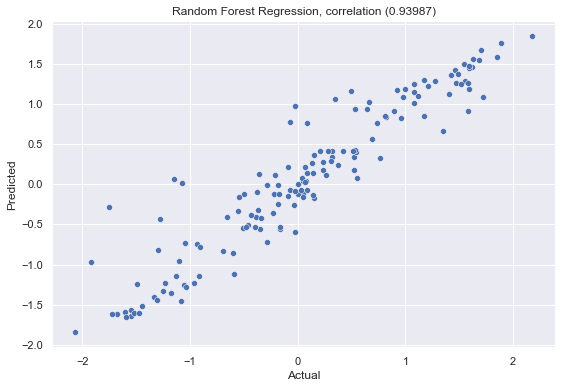

In [35]:
# find the correlation using Pearson’s Correlation between real answer and prediction
correlation = round(pearsonr(Y_test, Ypredicted)[0], 5)

title_name = "Random Forest Regression, correlation ({})".format(correlation)
x_axis_label = "Actual"
y_axis_label = "Predicted"
 
# plot data
simple_scatter_plot(Y_test, Ypredicted, "", title_name, x_axis_label, y_axis_label)

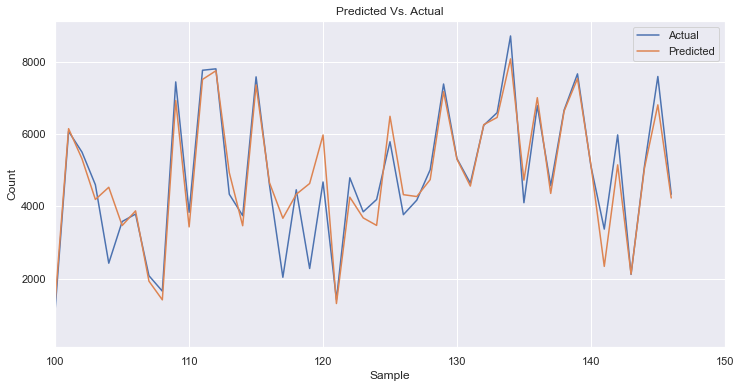

In [36]:
plt.figure(figsize=(12,6))
# Draw Actual Vs Predicted
plt.plot(Y_test*Y_sd+Y_mu, label='Actual')
plt.plot(Ypredicted*Y_sd+Y_mu,label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Count')
plt.xlim([100,150])
plt.title('Predicted Vs. Actual')
plt.legend()
plt.show()

# Important features ordered

In [37]:
print("Feature ranking ordered:")
important_features = pd.Series(data =  rf.feature_importances_, index = dfX.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

Feature ranking ordered:
temp          0.334888
yr            0.274369
atemp         0.150430
hum           0.069116
winter        0.035375
fall          0.031312
mnth          0.030817
windspeed     0.028190
weathersit    0.022327
weekday       0.013418
holiday       0.004185
workingday    0.003655
spring        0.001429
summer        0.000489
dtype: float64


# Use SHAP package

In [38]:
# import packages
import shap #Check version, SHAP 0.36.0
import time
# activate javascript
shap.initjs()

In [39]:
print(shap.__version__) # Needs to be updated if below SHAP 0.36.0  

0.40.0


# Use a SHAP Explainer to derive SHAP Values for the random forest regression model

In [40]:
from numpy import save
from numpy import load

In [41]:
# indicate your input to explain
INPUT = X
# explain all the predictions in the test set
t0 = time.time()
explainer = shap.TreeExplainer(rf) #TreeExplainer with SHAP 0.36.0  
shap_values = explainer.shap_values(INPUT)
t1 = time.time()
print(t1-t0, " sec taken")

38.974132776260376  sec taken


In [42]:
# save('shap_valuesA.npy', shap_values)
shap_values = load('Saved Shap Values for Section A/shap_valuesA.npy')

In [43]:
# the labels are boolean for year, map it to actual years
y_X = dfX.copy()
year_decoding = {    
    0: 2011,
    1: 2012
}
y_X["yr"] = y_X["yr"].map(year_decoding)
y_X.head(3)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,spring,summer,fall,winter
instant,,,,,,,,,,,,,,
1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,0,0,0,1
2,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,0,0,0,1
3,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,0,0,0,1


# SECTION A: With the day data

Course [IT728A]  
## Data Driven Decision Making

## Welemhret Welay Baraki

In [44]:
# shap_interaction_values = shap.TreeExplainer(rf).shap_interaction_values(INPUT)

In [45]:
# save('shap_interaction_valuesA.npy', shap_interaction_values)
shap_interaction_values = load('Saved Shap Values for Section A/shap_interaction_valuesA.npy')

In [46]:
shap_interaction_values.shape,y_X.shape

((731, 14, 14), (731, 14))

 ### A-1.
 Based on the model and explanation results, explore different seasons that would influence the bike rental counts positively and/or negatively (if none, state that there would be no influence)? 

If you are the CEO of this bike rental company, what is your marketing strategy for a certain season?  



There are four different types of seasons used in the day-bike shaing data for the years of 2011 and 2012. The problem can be visualized using summary plots, dependency plots and interaction plots. 
The summer in Washington DC is hot and humid. Whereas, the winter is cold with snows. Fall and spring are the usually the most pleasant weather in Washington, DC. (Source: https://weatherspark.com/y/20957/Average-Weather-in-Washington-D.C.;-United-States-Year-Round )

Summary plots are used to show and sort the most important features /variables/ that have high impact to the model output. 
According to the figure 1 (Summary Plots) below, the features year(yr), temperature(temp), Feeling Temperature(atemp), Humidity(hum),...etc are the top most important features impacting regression model. 

If we look at the four seasons in the summary plot below Figure 1, particularly winter, and fall  are the most impacting season features respectively. The summer and spring have little impact in the model prediction. From the summary plots they have little positive impact on the model prediction. 
The seasons value used in the summary plot below uses binary values 0(absence) or 1(presence). 

The winter(high red color which is 1) negatively impacts the bike rental. This aligns with the real world seasonal effects in the winter in which users don't prefer riding bike in the cold and snowy season. They may stay at their home or they prefer other means of transportation. Occasionally the customers of the bike sharing station use bikeshare for social/entertainment and errands/personal appointments trips. Due to the harsh weather conditions in the winter, most of the users that rent bike for entertainment are reduced. 

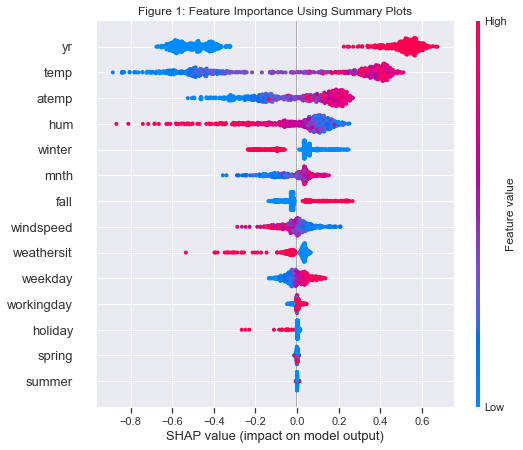

In [47]:
# 1.Summary Plots
FigCounter = 1
shap.summary_plot(shap_values, y_X, feature_names=dfX.columns, show=False)
plt.title("Figure " + str(FigCounter) + ": Feature Importance Using Summary Plots")
plt.show()
FigCounter = FigCounter + 1

The most suitable shap plot to show the individual influence of variables(i.e. Seasons - winter, fall, spring and summer) to target variable (i.e. Bike rental counts) is dependancy plot. 

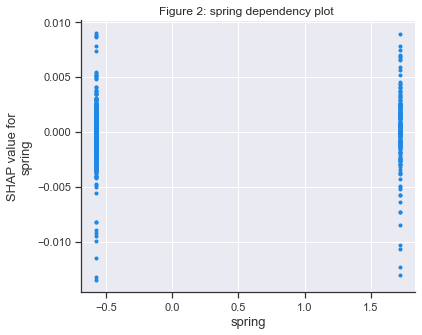

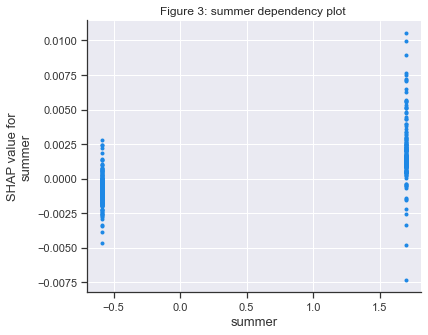

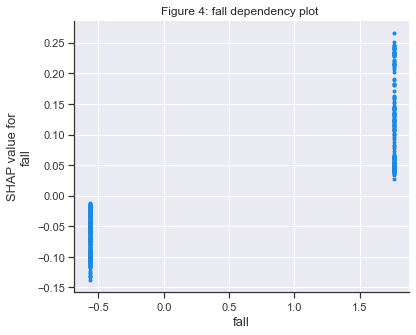

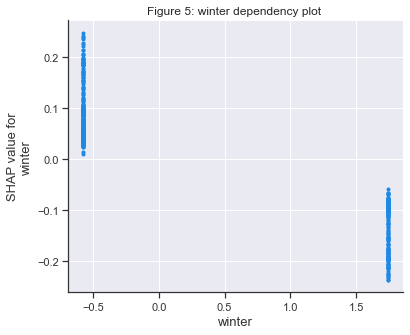

In [48]:
#Use the dependancy plot to show each seasons (spring, summer, fall, and winter) 
#impact on the model output/Bike rental counts/
#Without Interaction Index 
SeasonsInputList=["spring", "summer", "fall", "winter"]
for sea in SeasonsInputList: 
    shap.dependence_plot(sea, shap_values, INPUT, feature_names=dfX.columns, interaction_index=None, show=False)
    plt.title("Figure " + str(FigCounter) + ": " +sea + " dependency plot ")
    FigCounter=FigCounter+1
    plt.show()

From Figure 2 above the spring season is impacting neither negatively nor positively to the bike rental counts. The spring season is found in between the two extreme weather conditions(winter which is cold and summer is hot). The negative effect of winter season in the beginning of the spring season will be balanced with the positive effect of summer season in the last months of the Spring. Therefore, Spring have negligible impact in the bike rental counts. 

From Figure 3 and 4 above, of the seasons Summer and Fall are positively impacting the bike rentals. The summer and Fall are most likely hot and pleasant to ride. 

From Figure 5 above, the winter season negatively affects the bike rental counts. The winter season is the coldest and snowy season. In this season, users prefer other means of transporation and are not willing to take trip for entertainment and personal appointments. 

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


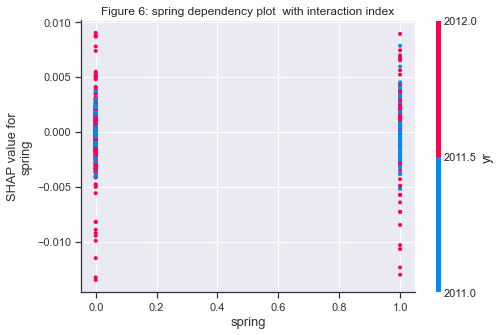

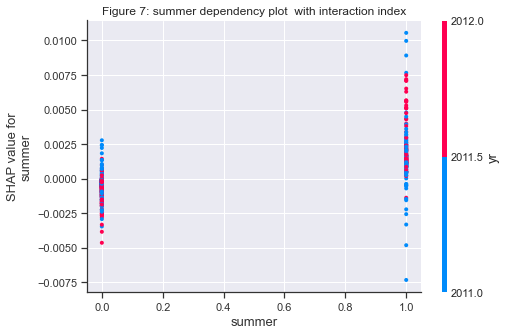

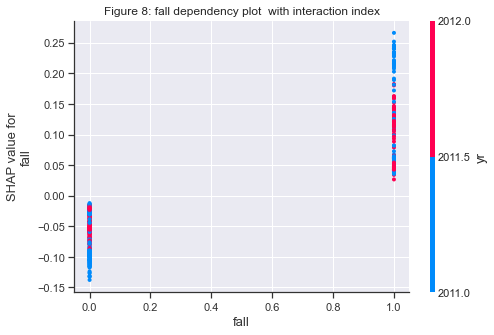

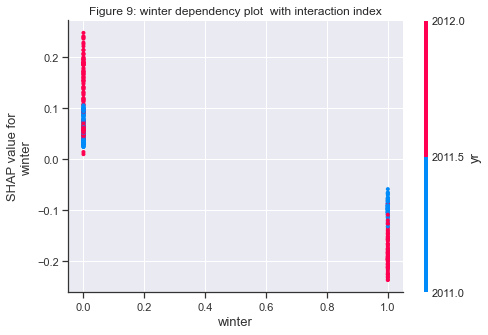

In [49]:
#Use the dependancy plot to show each seasons (spring, summer, fall, and winter) 
#impact on the model output/Bike rental counts/
#With Interaction Index 
SeasonsInputList=["spring", "summer", "fall", "winter"]
for sea in SeasonsInputList: 
    shap.dependence_plot(sea, shap_values, y_X, interaction_index='yr', show=False)
    plt.title("Figure " + str(FigCounter) + ": " +sea + " dependency plot  with interaction index")
    FigCounter=FigCounter+1
    plt.show()

From the above dependany plots in figures 6,7,8, & 9 are similar to the figures 2,3,4 and 5 except the year interaction feature. 
The only difference of these figures is that the plots are distinctly plotted for the years 2011 and 2012 in different colors. So the plots are intiutive to users, so that they can infere additional information for each of the years. They can compare and observe differences between each of the years. 

In figure 6 Spring dependency plot, the spring season is neither positively nor negatively impacting the bike rental counts. The shap values of the spring season are almost evely distributed to both negative and positive directions of the plot. 

In figure 7 the Summer dependency plot the Summer season in 2011 and 2012 are almost positively impacting the bike rental counts. 

In figure 8 the Fall dependency plot, the Fall season is positively impacting the bike rental counts. 

In figure 9 the Winter dependency plot, the Winter season is negatively impacting the bike rental counts. 
<hr/>

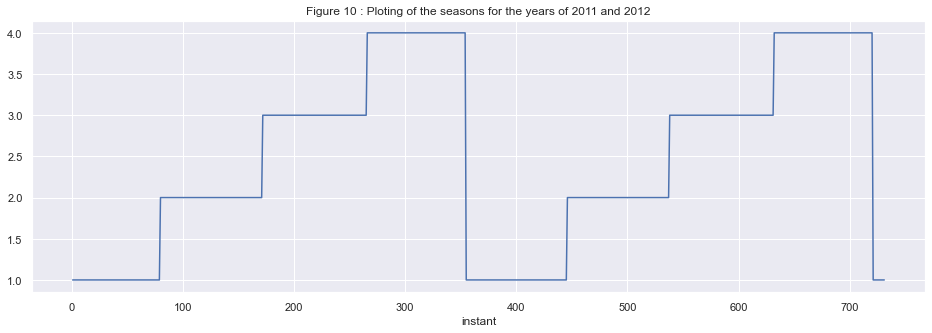

In [50]:
#plot the season feature
#season (1:winter, 2:spring, 3:summer, 4:fall)
plt.figure(figsize=(16,5))
plt.title("Figure " + str(FigCounter) +  " : Ploting of the seasons for the years of 2011 and 2012")
DataDF['season'].plot()
plt.show()
FigCounter=FigCounter+1


From the figure 10, summary plots and dependency plots above we can simply observe that there is a gradual increase from winter to spring, then to summer and fall. In the transition from fall to winter the bike rental will decrease due to the seasonal changes from hot to cold. User are not willing to ride in the winter season, because it is cold and snowy season. 

As a CEO the following actions will be recommended to take actions in boosting the market potential of the capital bike sharing company: 
1. Preparing Safety kits and encourage customers to ride during the cold and snowy season. This will increase the riding desire and habit of the customers and will increase bike rental counts. 
2. Prepare Bike Fenders to ensure users comfort. The Bike Fenders will protect users during bike riding from splashes of snow, mud, and slash. This will encourage riding in the winter season.  
3. Checking and preparing the bikes with the proper lighting systems, will use when the sun goes down. 
4. Prepare discount packages(daily, monthly) for the users that rides frequently in the winter season. 
5. The company should have to conduct frequent maintenance on the bikes and make necessary changes in their spare parts. 
6. In the seasons that are comfortable to ride buy new bicycles so that customers will increase. 

### A-2. 
Based on the model and explanation results, explore the interaction of three weather inputs 
(e.g., temperature, humidity, and windspeed), which weather would influence the bike rentals positively and/or negatively (if none, state that there would be no influence)? 

If you are the CEO of this bike rental company, what is your marketing strategy considering the weather status?  


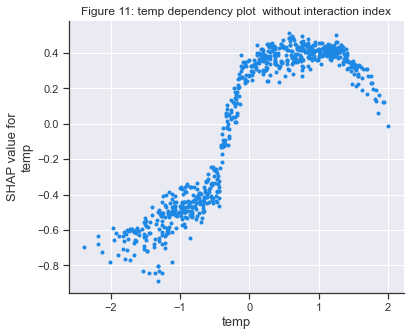

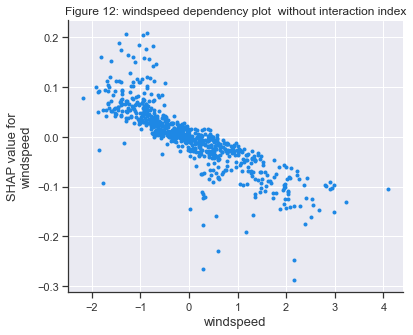

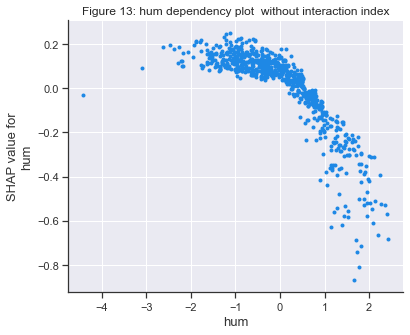

In [51]:
#Weather Situations without Interaction Index
WeatherInputList=['temp','windspeed','hum']
for w in WeatherInputList:
    shap.dependence_plot(w, shap_values, INPUT, feature_names=dfX.columns, interaction_index=None, show=False)
    plt.title("Figure " + str(FigCounter) + ": " +w + " dependency plot  without interaction index")
    FigCounter=FigCounter+1
    plt.show()


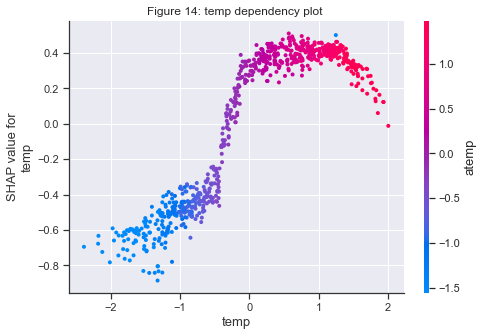

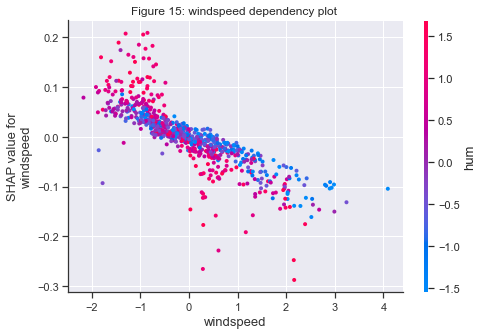

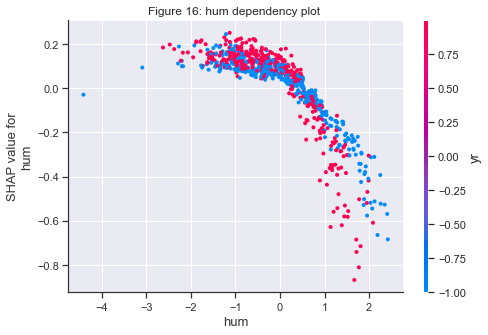

In [52]:
#Weather Situations with Interaction Index
WeatherInputList=['temp','windspeed','hum']
for w in WeatherInputList:
    shap.dependence_plot(w, shap_values, INPUT, feature_names=dfX.columns, show=False)
    plt.title("Figure " + str(FigCounter) + ": " +w + " dependency plot ")
    FigCounter=FigCounter+1
    plt.show()

From the above dependency plots and explanation of the three weather situations are provided below: 
- From figures 11 and 14, temperature dependency plot, the higher the temperature have positive impact on the bike rental counts. As the temperature increases, the bike rental count increases. After the temperature reaches certain point of increasing temperature (when it becomes hotter) the bike rental counts starts to decrease its impact to the model output. The lower the temperature have high negative impact on the bike rental counts. 
- From figure 12 and 15, the wind speed dependency plot: the lower the wind speed shows high positive impact on the bike rental counts. Whereas the higher the wind speed shows the low negative impact on the bike rental counts. 
- From figure 13 and 16, the lower humidity have low positive impact on the bike rental counts. The higher the humidity shows  negative impact on the bike rental counts.

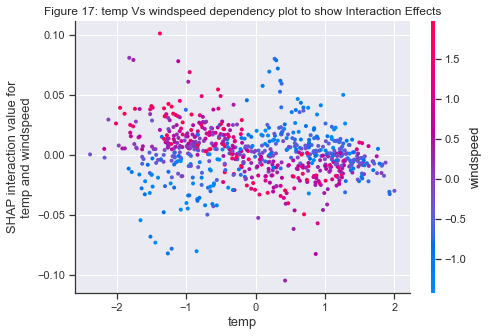

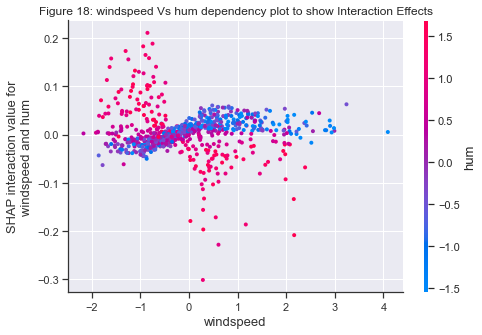

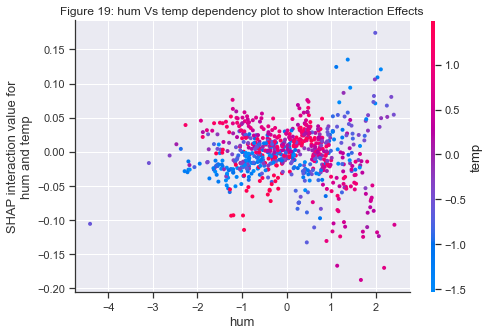

In [53]:
#Combinations of Weather Situations 
WeatherInputDict={'temp':'windspeed','windspeed':'hum','hum':'temp'}
for key,values in WeatherInputDict.items(): 
    shap.dependence_plot(
        (key, values),
        shap_interaction_values, INPUT,
        display_features= dfX,show=False
    )
    plt.title("Figure " + str(FigCounter) + ": " +key+ " Vs " + values + " dependency plot to show Interaction Effects")
    FigCounter=FigCounter+1
    plt.show()


In [54]:
shap_interaction_values.shape

(731, 14, 14)

### Interaction dependency plots of the three weather inputs 
##### From Figure 17: Temperature vs Windspeed dependency plots 
- When the wind speed is low and temperature is low, the interaction effect have negative impact on the bike rental counts. 
- When the wind speed is low and temperature is high, the interaction effect have low positive impact on the bike rental counts. 
- When the wind speed is high and temperature is low, the interaction effect have low positive impact on the bike rental counts. 
- When the wind speed is high and temperature is high, the interaction effect have low negative impact on the bike rental counts. 
##### From Figure 18: Humidity vs Windspeed dependency plots 
- When the wind speed is low and Humidity is low, the interaction effect have low negative impact on the bike rental counts. 
- When the wind speed is low and Humidity is high, the interaction effect have  positive impact on the bike rental counts. 
- When the wind speed is high and Humidity is low, the interaction effect have low positive impact on the bike rental counts. 
- When the wind speed is high and Humidity is high, the interaction effect have negative impact on the bike rental counts. 
##### From Figure 19: Humidity vs Temperature dependency plots 
- When the Temperature is low and Humidity is low, the interaction effect have negative impact on the bike rental counts. 
- When the Temperature is low and Humidity is high, the interaction effect have  positive impact on the bike rental counts. 
- When the Temperature is high and Humidity is low, the interaction effect have  positive impact on the bike rental counts. 
- When the Temperature is high and Humidity is high, the interaction effect have negative impact on the bike rental counts. 

<hr/>
The three weather inputs temperature, windspeed and humidity are plotted above using summary plots, dependancy and interaction plots. 

#### From Summary Plot Figure 1 

From the summary plot in figure 1, temperature, humidity and windspeed are among the top impacting features to the bike rental counts: 

- The higher the temperature have high and  positive impact on the bike rental counts. The lower the temperature have high and negative impact on the bike rental counts. 
- Higher humidity shows high and negative impact on the bike rental counts. Lower the humidity have low positive impact on the bike rental counts. 
- High wind speed have low negative impact on the bike rental counts. Whereas, the lower the wind speed have low positive impact on the bike rental counts. 



As a CEO of the company the following marketing strategy suggestions can be considered: 
- Increase the availability of bikes in stations when the temperature increases, wind speed decreases and humidity decreases. 
- Prepare safety kits when the temperature is too low.
- Provide travel recommendations to the registered users based on the weather situations 
- When the wind speed is low, normal room temperature and moderate humidity, encourage the users to ride based on the best time recommendation of the system according to the analysis of the weather situations. 
- Provide travel cautions in hours of a day or days of a month example the users should have to stay when the windspeed is too high

## A-3. 
Based on the model and explanation results, 2011 and 2012 show different patterns. 
Considering the years, which months would influence the bike rental counts positively and/or negatively (if none, state that there would be no influence)? 

If you are the CEO of this bike rental company, what is your marketing strategy for certain months?  


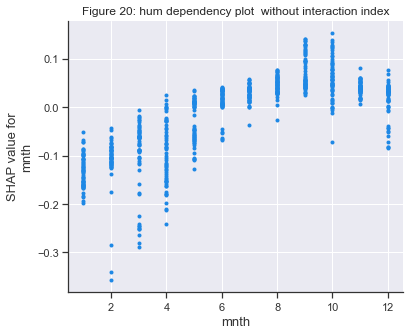

In [55]:
shap.dependence_plot("mnth", shap_values, y_X, feature_names=dfX.columns, interaction_index=None, show=False)
plt.title("Figure " + str(FigCounter) + ": " +w + " dependency plot  without interaction index")
FigCounter=FigCounter+1
plt.show()

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


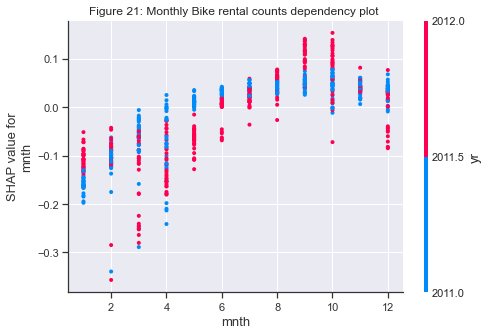

In [56]:
shap.dependence_plot("mnth", shap_values, y_X, interaction_index='yr', show=False)
plt.title("Figure " + str(FigCounter) + ": Monthly Bike rental counts dependency plot ")
FigCounter=FigCounter+1
plt.show()

- From figures 20 and 21 of the above  dependency plots: 
    - In the Year 2011: 
        - The months January, February, March and April have negative impact on the bike rental counts. 
        - The months May to December in the year 2011 have positive impact on the bike rental counts. 
    - In the Year 2012: 
        - In the year 2012, the months January, February, March and April have negative impact on the bike rental counts. 
        - The months June to December have slightly small overall negative impact on the bike rental counts/Generally this is ambiguous to conclude that their impact is negative or positive on the bike rental counts/. 
        - The months July to November have positive impact on the bike rental counts. 


As a CEO the marketing strategy for each month can be stated as follows: 
- The months that have negative impact(January to May) are related to the difficult weather situations (Cold and snowy seasons), discount packages will be provided based on daily, and monthly schedules. These discounts will encourage the users to ride a bike on the cold winter and spring seasons. Provide safety kits. 
- At months that have positive impact (June - December), increase the number of bikes and advertise to ride bikes for entertainment and other travel trips 
- Create an awareness on the advantage of bike riding interms of health and environmental implications. This will rise their interest on bike riding and will be your regular customers. 
- Advertise that bike riding have health, environmental and economic advantage to the users. 

## A-4. 
Based on the model and explanation results, which type of days (“working days” and the 
“holiday/weekends”) would influence the bike rental counts positively and/or negatively (if none, state that there would be no influence)?   

If you are the CEO of this bike rental company, what is your marketing strategy for the working days or holiday/weekends (select the type of day based on lower rental counts, if any)? 


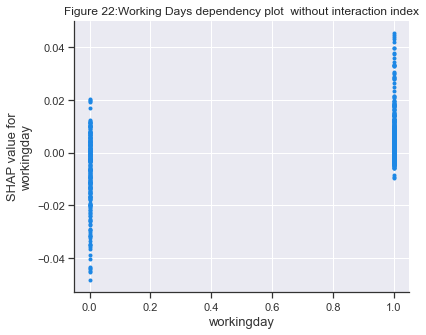

In [57]:
# workingday without interaction index
shap.dependence_plot('workingday', shap_values, y_X, interaction_index=None,show =False)
plt.title("Figure " + str(FigCounter) + ":Working Days dependency plot  without interaction index")
FigCounter=FigCounter+1
plt.show()

From the above working days dependency plots (fig 22):
- The holidays/weekends (i.e. not working days) have an overall negative impact on the bike rental counts.
- The working days have an overall positive impact on the bike rental counts. 

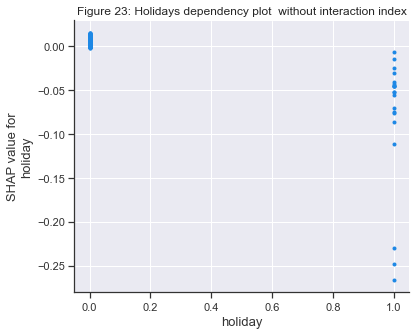

In [58]:
# holiday without interaction index
shap.dependence_plot('holiday', shap_values, y_X, interaction_index=None,show=False)
plt.title("Figure " + str(FigCounter) + ": Holidays dependency plot  without interaction index")
FigCounter=FigCounter+1
plt.show()

From the above holidays dependency plot (figure 23):
- The days that are not holiday have small positive impact on the bike rental counts. 
- The holiday have big negative impact on the bike rental counts. 

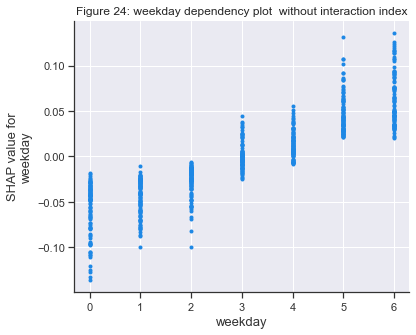

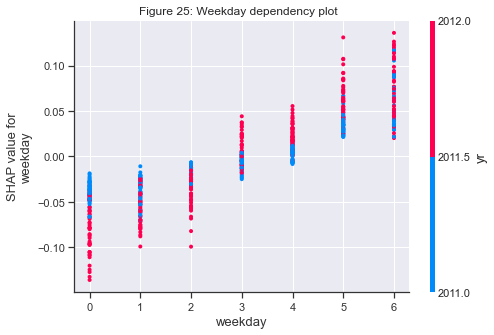

In [59]:
#The weekends from the weekdays /values 5 -Satureday and 6-Sunday /
# Weekends without interaction index
shap.dependence_plot('weekday', shap_values, y_X, interaction_index=None,show=False)
plt.title("Figure " + str(FigCounter) + ": weekday dependency plot  without interaction index")
FigCounter=FigCounter+1
plt.show()
# Weekends with interaction index
shap.dependence_plot('weekday', shap_values, y_X,show=False)
plt.title("Figure " + str(FigCounter) + ": Weekday dependency plot  ")
FigCounter=FigCounter+1
plt.show()

From the above week days dependency plots (Figure 24 and 25):
- Monday, Tuesday and wednesday have negative impact on the bike rental counts. 
- According the figure 26, Thursday have low overall shap influence in the bike rental counts. Based on the figure 27, Thursday have negative impact on the bike rental counts in the year 2011 and have positive impact on the bike rental counts in the year 2012. 
- Friday have positive impact on the bike rental counts in the year 2012 and have small SHAP overall impact on the bike rental counts in the year 2011. 
- The weekends have positive impact on the bike rental counts in both of the years.

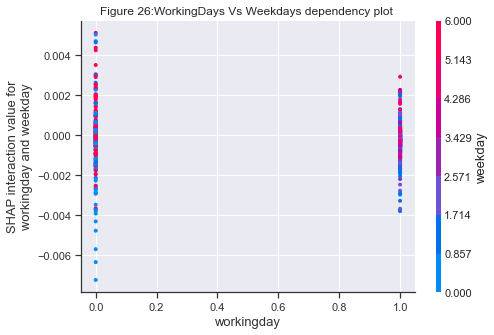

In [60]:
# Interaction Plots of Working days and Weekdays using dependency plots  
shap.dependence_plot(
        ('workingday', 'weekday'),
        shap_interaction_values, y_X,
        display_features= dfX,
        show=False
    )
plt.title("Figure " + str(FigCounter) + ":WorkingDays Vs Weekdays dependency plot ")
FigCounter=FigCounter+1
plt.show()

From the dependency plot (workingdays vs Weekends/Weekdays/):
- In the weekends and in the days other than workingdays the interaction effect shows an overall positive impact on the bike rental counts. 
- In the other days of the week (Except the weekend), the shap values are spread symmetrically both to the negative and positive direction. As a result the dependecy plot shows small overall shap influence on the bike rental counts. And is difficult to identify and decide each of the days impact on the bike rental counts. The coloring scheme of the seven days creates confusion and makes it difficult to identify by the human intution. 

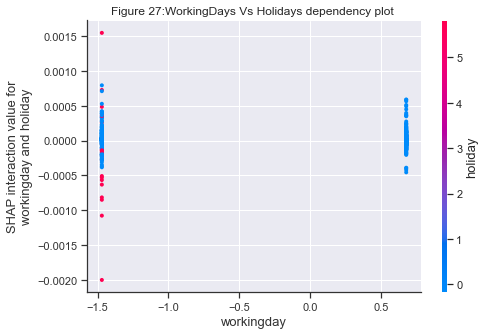

In [61]:
# Interaction Plots of Working days and Holiday using dependency plots  
shap.dependence_plot(
        ('workingday', 'holiday'),
        shap_interaction_values, INPUT,
        display_features= dfX,
        show=False
    )
plt.title("Figure " + str(FigCounter) + ":WorkingDays Vs Holidays dependency plot ")
FigCounter=FigCounter+1
plt.show()

### From Figure 27: Workingdays vs holidays
- The interaction plot shows that the shap values are symetrically spread towards the negative and postive direction in the plot. This shows that the overall shap influence is small to intuitively define its effect. 

As a CEO the following marketing strategies will be used to increase the use of Bikes in the holidays and weekends: 
- Give family discounts to engage all of thier relatives to rent bike to go to the entertainment. 
- Prepare holiday lottery/ gifts based on their milage and usage. 
- Advertise to use bike when they go to work, and travel around the washington DC. 
- Encourage users to use bike to go to working places and personal appointments. 
- In the holidays and weekends, provide discount packages for teams and groups that they together want to go to the entertainment and party. 

## A-5. 
Based on the model and explanation results, what do you observe as similarities and differences of influencing factors between casual and registered customers towards renting a bike (if none, state that there would be no influence from different types of customers (e.g.,
casual vs. registered))? 

If you are the CEO of this bike rental company, what is your marketing strategy for a different type of customer (select the type of customer based on lower rental counts, if any)? 


In [62]:
# Store the Initial data frame
data=DataDF.copy()

In [63]:
#select the targets casual and registered
featuresCandR = ['season', 'yr', 'mnth','holiday','weekday','workingday',
          'weathersit','temp','atemp','hum','windspeed','registered','casual','cnt']
# categorical variables (one hot encoding!!)
cat_var = ['season']
DataDF = pd.get_dummies(DataDF[featuresCandR], columns = cat_var,  prefix_sep = '.')

In [64]:
# rename the column names
#season (1:winter, 2:spring, 3:summer, 4:fall)
DataDF.rename(columns={'season.1': 'winter', 'season.2': 'spring', 'season.3': 'summer', 'season.4': 'fall'}, inplace=True)

In [65]:
# Drop the registered, casual and cnt 
DataDFX=DataDF.drop(['registered','casual','cnt'], axis=1, inplace=False)

In [66]:
# Normalize data: Calculate mean and standard deviation
mu = DataDF.mean(0)
sd = DataDF.std(0)

# Normalize data
df_norm = (DataDF - mu) / sd
df_norm.head(3)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,casual,cnt,winter,spring,summer,fall
instant,,,,,,,,,,,,,,,,,
1,-1.000684,-1.599066,-0.171863,1.497783,-1.470218,1.109667,-0.826097,-0.679481,1.249316,-0.387626,-1.924153,-0.753218,-1.816709,1.741987,-0.579586,-0.588006,-0.566957
2,-1.000684,-1.599066,-0.171863,-1.495054,-1.470218,1.109667,-0.720601,-0.740146,0.478785,0.749089,-1.913899,-1.044499,-1.911691,1.741987,-0.579586,-0.588006,-0.566957
3,-1.000684,-1.599066,-0.171863,-0.996248,0.679241,-0.725551,-1.633538,-1.748570,-1.338358,0.746121,-1.555624,-1.060519,-1.628810,1.741987,-0.579586,-0.588006,-0.566957


### Casual Users Model

In [67]:
#Features used to predict
InputFeaturesCasual=['yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'winter', 'spring', 'summer',
       'fall']
#Casual Target Feature 
TargetCasual =['casual']
# X and Y features
YCNew = np.asarray(df_norm[TargetCasual]).ravel()
YC_mu = np.asarray(mu[TargetCasual])
YC_sd = np.asarray(sd[TargetCasual])
# Note: Put the variables that would be used as inputs
XCNew = np.asarray(df_norm[InputFeaturesCasual])

In [68]:
XCNew.shape, YCNew.shape

((731, 14), (731,))

In [69]:
# Split the data into train and test data:
XCNew_train, XCNew_test, YCNew_train, YCNew_test = train_test_split(XCNew, YCNew, test_size = 0.2)

In [70]:
#Build a Random Forest model 
NewRFCasual = RandomForestRegressor(n_estimators=3) 
NewRFCasual.fit(XCNew_train, YCNew_train)
YCNewpredicted = NewRFCasual.predict(XCNew_test) 

In [71]:
#Evaluate the regression model
print(r2_score(YCNew_test, YCNewpredicted))
print("RMSE: {0:0.4f}".format(mean_squared_error(YCNew_test, YCNewpredicted)))
print("MAE: {0:0.4f}".format(mean_absolute_error(YCNew_test, YCNewpredicted)))

0.6946287153109624
RMSE: 0.2615
MAE: 0.3284


## Registered Users model

In [72]:
#Features used to predict
InputFeaturesRegistered=['yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'winter', 'spring', 'summer',
       'fall']
#Casual Target Feature 
TargetRegistered =['registered']
# X and Y features
YRNew = np.asarray(df_norm[TargetRegistered]).ravel()
YR_mu = np.asarray(mu[TargetRegistered])
YR_sd = np.asarray(sd[TargetRegistered])
# Note: Put the variables that would be used as inputs
XRNew = np.asarray(df_norm[InputFeaturesRegistered])

In [73]:
# Split the data into train and test data:
XRNew_train, XRNew_test, YRNew_train, YRNew_test = train_test_split(XRNew, YRNew, test_size = 0.2)

In [74]:
#Build a Random Forest model 
NewRFRegistered = RandomForestRegressor(n_estimators=3) 
NewRFRegistered.fit(XRNew_train, YRNew_train)
YRNewpredicted = NewRFRegistered.predict(XRNew_test) 

In [75]:
#Evaluate the regression model
print(r2_score(YRNew_test, YRNewpredicted))
print("RMSE: {0:0.4f}".format(mean_squared_error(YRNew_test, YRNewpredicted)))
print("MAE: {0:0.4f}".format(mean_absolute_error(YRNew_test, YRNewpredicted)))

0.8190156647895855
RMSE: 0.1722
MAE: 0.3053


## Visualization and Explanation on the Registered and Casual models 

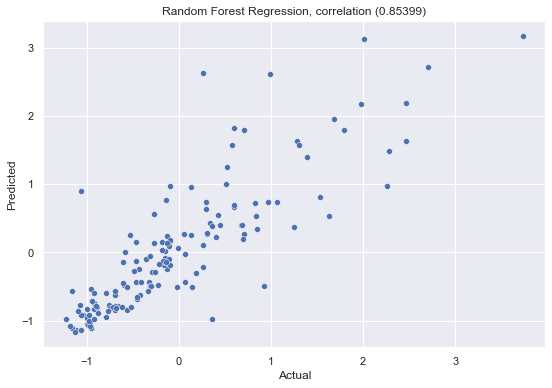

In [76]:
# find the correlation using Pearson’s Correlation between real answer and prediction on the Casual Users Model
correlation = round(pearsonr(YCNew_test, YCNewpredicted)[0], 5)

title_name = "Random Forest Regression, correlation ({})".format(correlation)
x_axis_label = "Actual"
y_axis_label = "Predicted"
 
# plot data
simple_scatter_plot(YCNew_test, YCNewpredicted, "", title_name, x_axis_label, y_axis_label)

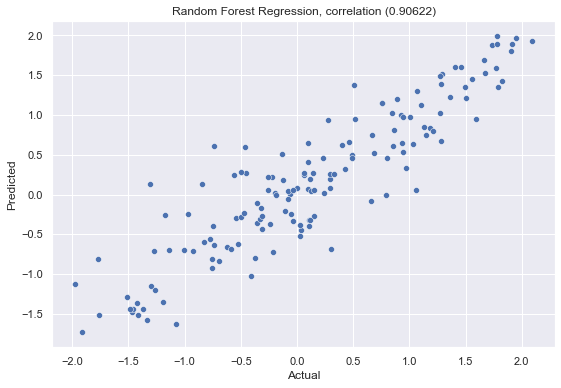

In [77]:
# find the correlation using Pearson’s Correlation between real answer and prediction on the Registered Users Model
correlation = round(pearsonr(YRNew_test, YRNewpredicted)[0], 5)

title_name = "Random Forest Regression, correlation ({})".format(correlation)
x_axis_label = "Actual"
y_axis_label = "Predicted"
 
# plot data
simple_scatter_plot(YRNew_test, YRNewpredicted, "", title_name, x_axis_label, y_axis_label)

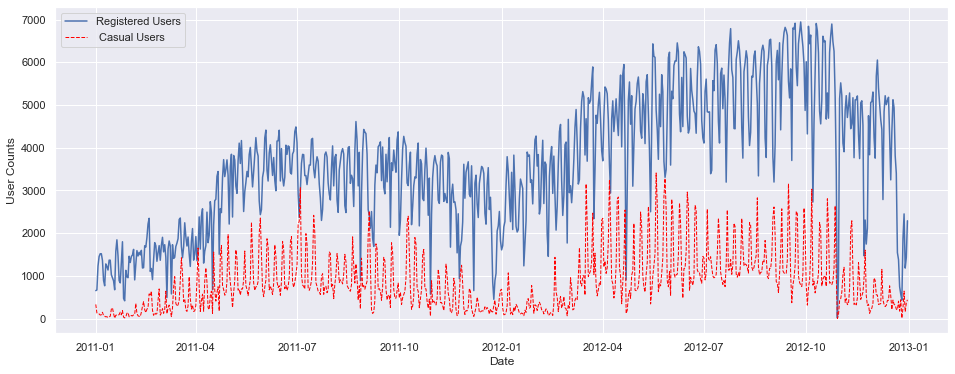

In [78]:
#plot the daily casual and registered bike rental counts  in 2011 and 2012
import matplotlib.pyplot as plt
import numpy as np
RUsers = data['registered']
CUsers = data['casual']
date=pd.to_datetime(data['dteday'])
plt.figure(num = 3, figsize=(16, 6))
plt.plot(date, RUsers, label='Registered Users')
plt.plot(date, CUsers, 
         color='red',   
         linewidth=1.0,  
         linestyle='--',
         label=" Casual Users"
        )
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("User Counts")

plt.show()

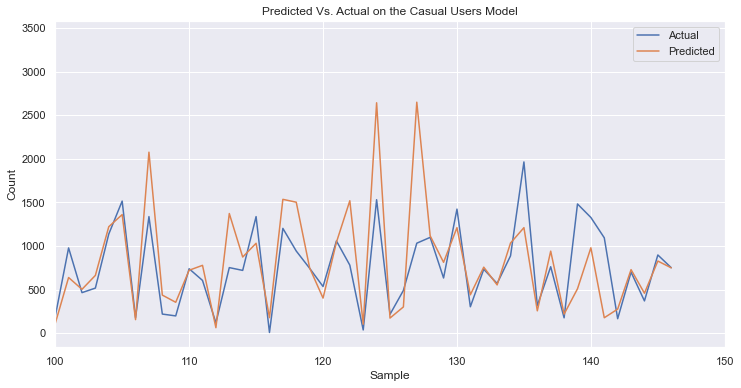

In [79]:
plt.figure(figsize=(12,6))
# Draw Actual Vs Predicted
plt.plot(YCNew_test*YC_sd+YC_mu, label='Actual')
plt.plot(YCNewpredicted*YC_sd+YC_mu,label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Count')
plt.xlim([100,150])
plt.title('Predicted Vs. Actual on the Casual Users Model')
plt.legend()
plt.show()

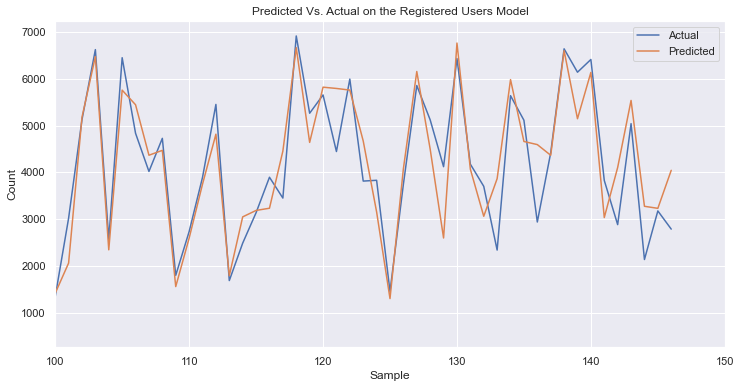

In [80]:
plt.figure(figsize=(12,6))
# Draw Actual Vs Predicted
plt.plot(YRNew_test*YR_sd+YR_mu, label='Actual')
plt.plot(YRNewpredicted*YR_sd+YR_mu,label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Count')
plt.xlim([100,150])
plt.title('Predicted Vs. Actual on the Registered Users Model')
plt.legend()
plt.show()

## Generating Shap Values for the Casual Regression Model

In [81]:
# indicate your input to explain for the Casual Users model
INPUTCNew = XCNew
explainerCasual = shap.TreeExplainer(NewRFCasual)   
shap_valuesCasual = explainerCasual.shap_values(INPUTCNew)

In [82]:
save('ACasualShap_Values.npy', shap_valuesCasual)
shap_valuesCR=load("ACasualShap_Values.npy")

## Generating Shapely Values for the Registered Regression Model

In [83]:
# indicate your input to explain for the Casual Users model
INPUTRNew = XRNew
explainerRegistered = shap.TreeExplainer(NewRFRegistered)   
shap_valuesRegistered = explainerRegistered.shap_values(INPUTRNew)

In [84]:
# Save and Load the shap values to local file
save('ARegisteredShap_Values.npy', shap_valuesRegistered)
shap_valuesRegistered=load("ARegisteredShap_Values.npy")

### Explaining the two Machine Learning Models

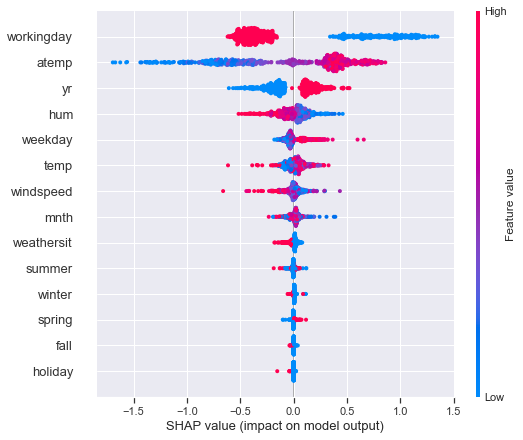

In [85]:
#Summary plots for the Casual users regression model
shap.summary_plot(shap_valuesCasual, INPUTCNew, feature_names=DataDFX.columns)

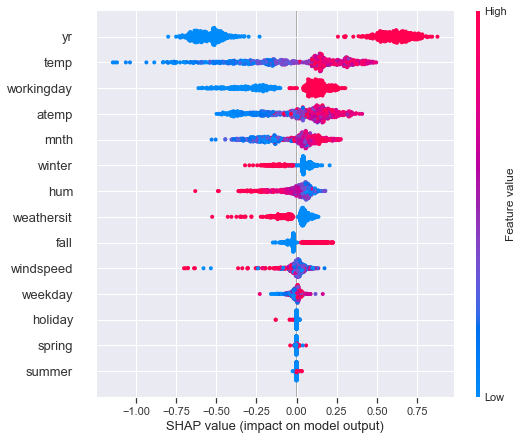

In [86]:
#Summary plots for the Registered Users Regression model
shap.summary_plot(shap_valuesRegistered, INPUTRNew, feature_names=DataDFX.columns)

### Casual and Registered models 
#### Casual and Registered Users 
- Registered users are regular members of the bike rental company Their membership can be annualy or monthly. 
- Casual users are rider for single trip, 24 hours pass, 3 or 5 days pass. 

#### Similarities and differences of influencing factors of Casual and Registered Regression models
- The most important features that have high impact in the casual models are workingday(working days),atemp(feeling temperature), yr(year), hum(Humidity), weekday (days of the week), temp (temperature),and wind speed. The bike rental counts negatively impacted in the working days, but positively impacted the bike rentals in the holidays/weekends/. From this we can infer that most of the casual users rent bike for personal appointment and touring for leisure, entertainment and personal appointments. Of the top influencing factors that affect the bike rental counts of casual users are mostly affected by the environmental conditions such as temperature, humidity and wind speed. Most of the weather conditions affect on the personal decision of the casual users. Casual users use bike to personal appointment and spend their leisure in the holidays and weekends. 
- The most important features that have high impact in the registered model are yr (Year), temp (temperature), workingday (Working days), atemp (Feeling temperature), mnth (month), winter, humidity, weather situation, fall and wind speed. From the registered model the year have high impact of all other features is that due to the regular annual or monthly membership of bike rentals to go to thier work, personal appointment and touring for leisure in the holidys/weekends/. The registered users riding behaviour can be affected by the temperature, working days or holidays/weekends/, weather situations, and different weather conditions. 
- Similarities of the influencing factors to the two models are: 
    - The similar features workinday, yr, atemp, humidity and temp have high impact on the bike rental counts of the two models with significant difference in orderings and shap values. 
    - The feature yr have similar impact on the bike rental counts of the two models. 
- Differences of the influencing factors to the two models are: 
    - Eventhough there are similarities of the influencing factors of the two models, thier importance ordering and shap values are different. 
    - The workingday(i.e. 3rd rank in the registered users regression model) feature have the highest impact in the casual users regression model, whereas, yr (i.e. 3rd in the casual model) have the highest impact in registered users regression model. The workingday also influences the two models in opposite directions. 
    - The bike rental counts in the registered model are higher than compared to the casual regression model based on the time series line chart. 
    - The accuracy of casual regression model is lower than the registered regression model. This can be due to the nature of low predictability of the casual bike rentals than that of regular registered users. 

- As a CEO of the bike rental company the following marketing strategy will be suggested: 
    - Basd on the distribution of the casual and registered users, the counts of casual users are smaller than the registered users. In order to increase the registered users, discount packages and  annual or monthly lottery based extra gifts of the registered users should have to be advertised. As a result, the casual users will become registered regular users and increase the profitability of the bike rental company. 
    - The weather situations and conditions will determine the riding behavior of casual and registered users. So that the company should have to give them weather related safety information to show care for the users. As a result the users will be interested in the services of the bike retal company and will be registered users or casual users based on their plan. 
    - Provide safety kitts in the harsh weather situations. This will boost the riding behavior of the customers. 

## A-6.
List the top 5 pairs of features that show higher interactions and explain (SHAP interaction plot)

In [87]:
intrct_avg = np.abs(shap_interaction_values).mean(0)
intrct_avg_nodiag = intrct_avg.copy()
np.fill_diagonal(intrct_avg_nodiag, 0)
intrct_df = pd.DataFrame(intrct_avg_nodiag)
intrct_df.columns = dfX.columns
intrct_df.index = dfX.columns
intrct_df.head(3)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,spring,summer,fall,winter
yr,0.000000,0.014577,0.000528,0.010947,0.001997,0.005013,0.031353,0.016277,0.031215,0.008407,0.000850,0.000307,0.014278,0.026748
mnth,0.014577,0.000000,0.000276,0.002871,0.001583,0.002547,0.023687,0.011529,0.011057,0.003051,0.001021,0.000140,0.003521,0.004982
holiday,0.000528,0.000276,0.000000,0.000116,0.000040,0.000121,0.002345,0.000822,0.000577,0.000225,0.000022,0.000013,0.001422,0.000851


In [88]:
#Returns the location index of the maximum in each row
LocDict=intrct_df.idxmax().to_dict()
#Create a dataframe to sort the values 
IntractMax=pd.DataFrame(columns=['Row','Col','Value'])
for key, value in LocDict.items():
        IntractMax=IntractMax.append({'Row':key,'Col':value,'Value':np.round(intrct_df.at[key,value],6)},ignore_index=True)
IntractMax=IntractMax.sort_values('Value',ascending=False)

In [89]:
#Remove duplicates values of the similar pairs (i,j) or (j,i) 
IntractMax=IntractMax.drop_duplicates(subset=['Value'],keep='first')
DictPairs=pd.Series(IntractMax.Col.values,index=IntractMax.Row).to_dict() 

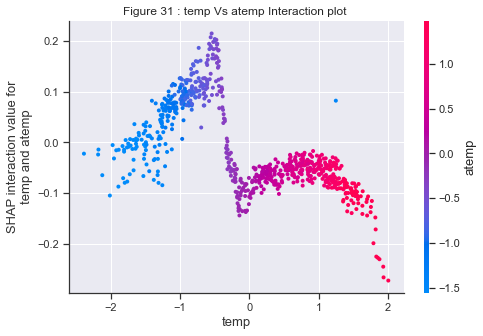

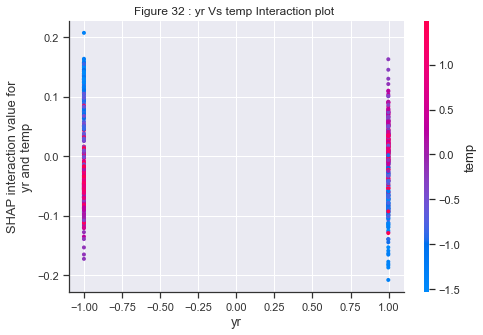

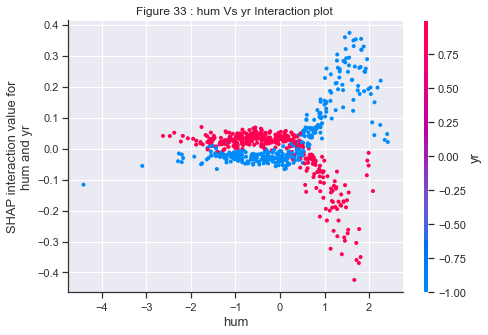

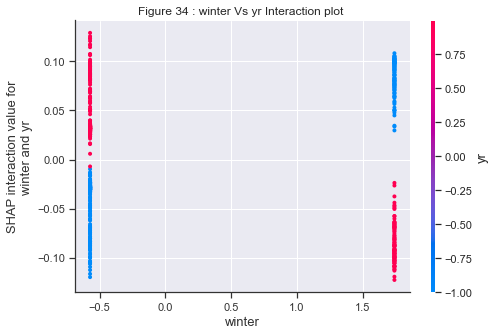

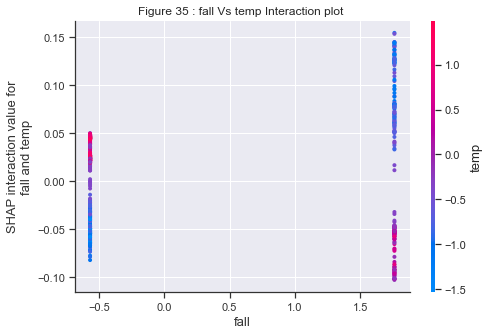

In [90]:
#Plot the top interacting pairs of features  
counter=0
FigCounter=31
for Key,Value in DictPairs.items():
    if counter <5:
        shap.dependence_plot((Key, Value), shap_interaction_values, INPUT,  display_features= dfX,show=False)
        plt.title("Figure " + str(FigCounter) + " : " + Key + " Vs " + Value + " Interaction plot ")
        FigCounter=FigCounter+1
        counter=counter+1
    else:
        break

The top 5 pairs of interacting features from the Shap interaction plot are: 
- Temperature Vs Feeling Temperature (atemp)
    - When the temperature is low and feeling temperature is low their interaction effect have low negative impact on the bike rental counts. As the two temperatures increases to their average, their interaction effect changes from small negative impact to positive impact on the bike rental counts. 
    - Around the average of the two temperatures, their interaction effect changes from positive impact to small negative impact on the bike rental counts. 
    - When the two temperatures are above the average, their interaction effect impacts negatively to the bike rental counts. 
- Year Vs Temperature 
    - In the year 2011, when the temperature is low their interaction effect have positive impact on the bike rental counts. 
    - In the year 2011, when the temperature increases from above average to high temperature their interaction effect of have low negative impact on the bike rental counts. 
    - In the year 2012, when the temperature is low their iteraction effect have negative impact on the bike rental counts. 
    - In the year 2012, when the temperature is above average to high temperature, their interaction effect have positive impact on the bike rental counts. 
- Humidity Vs Year 
    - In the year 2011, and humidity is high their interaction effect have positive impact on the bike rental counts. 
    - In the year 2011, and humidity is low their interaction effect have small negative impact on the bike rental counts. 
    - In the year 2012, and humidity is high their interaction effect have negative impact on the bike rental counts. 
    - In the year 2012, and humidity is low their interaction effect have positive impact on the bike rental counts. 
- Winter Vs Year
    - In the winter season and year 2011, their interaction effect have positive impact on the bike rental counts. 
    - In the winter season and year 2012, their interaction effect have negative impact on the bike rental counts.
    - In the seasons other than winter season, and year 2011, their interaction effect have negative impact on the bike rental counts. 
    - In the seasons other than winter season, and year 2012, their interaction effect have positve impact on the bike rental counts.      
- Fall season Vs Temperature
    - In the seasons other than fall, when the temperature is high their interaction have low positive impact on the bike rental counts. Whereas, if the temperature is low their interaction have high negative impact on the bike rental counts. 
    - In the fall season season, when the temperature is high  their interaction effect have high negative impact on the bike rental counts. 
    - In the fall season, when the temperature is low their interaction have high positive impact on the bike rental counts. 

A-7. Regarding uncertainty visualization, apply a technique to improve the uncertainty of one aspect above. Is there any uncertainty that needs to be revealed? (For example, a violin plot can visualize the whole distribution and explain the seasonal aspect better.) 

Checking Uncertainity using violin plots  on distribution of the three weather inputs on Temperature, Humidity and windspeed (<b>A-2</b>)

In [91]:
import plotly.express as px 

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

### Violin Plots 
violin plots are used to represent comparison of a weahter input distribution (or sample distribution) across the years 2011 and 2012.

In [92]:
# Violin plots for Humidity distribution
ViolinFig=px.violin(y_X, y='hum', box=True, color='yr', hover_data=y_X.columns,points='all',
                    title="Figure " + str(FigCounter) + " :Humidity Distribution of the Years 2011/12 ")
ViolinFig.show()
FigCounter=FigCounter+1

#### Humidity Distribution of the Years 2011/12 From the above Violin Plots
 Uncertainities/Outliers/ are observed in the 2011 around the minimum humidity distribution. The humidity distribution in the years 2012 have no outliers. 

In [93]:
ViolinFig=px.violin(y_X, y='temp', box=True, color='yr', hover_data=y_X.columns,points='all',
                    title="Fig  " + str(FigCounter) + " : Temperature Distribution of the Years 2011/12 ")
FigCounter=FigCounter+1
ViolinFig.show()

#### Temperature Distribution of the Years 2011/12
The temperature distribution in the years 2011 and 2012 have no outliers. 

In [94]:
ViolinFig=px.violin(y_X, y='windspeed', box=True, color='yr', hover_data=y_X.columns,points='all',
                    title="Fig " + str(FigCounter) + " :Wind Speed Distribution of the Years 2011/12 ")
FigCounter=FigCounter+1
ViolinFig.show()

###  Wind Speed Distribution of the Years 2011/12
The wind speed distribution in the years 2011 and 2012 have  outliers above the adjusted maximum wind speed. 

## A-8. 
Based on the model and explanation results, is the Temperature (temp) in the years 2011 and 2012, that influence the bike rental counts is positive and/or negative (if none, state that there would be no influence)?

If you are the CEO of this bike rental company, what is your marketing strategy for this situation ?

C:\Users\Weldat\anaconda3\lib\site-packages\shap\plots\_scatter.py:676: MatplotlibDeprecationWarning:

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



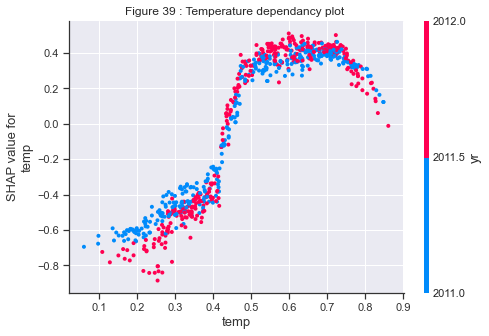

In [95]:
# Feeling temperature /atemp/ 
shap.dependence_plot('temp', shap_values, y_X, feature_names=dfX.columns, interaction_index='yr', show=False)
plt.title("Figure " + str(FigCounter) + " : Temperature dependancy plot ")
FigCounter=FigCounter+1


From the above dependency plot: 
- The years 2011 and 2012 have similar impact patterns on the bike rental counts. 
- If the temperature is below average, the temperature have negative impact on the bike rental counts. 
- For the temperature above average, the temperature have positive impact on the bike rental counts. 

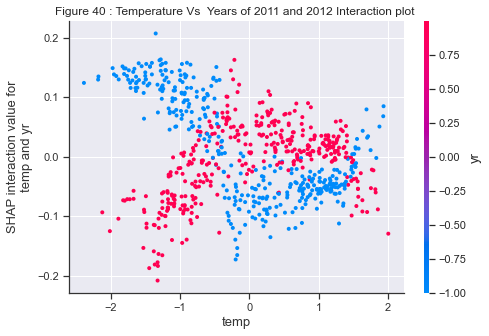

In [96]:
#Interaction effects of temperature vs years 
shap.dependence_plot(
    ("temp", "yr"),
    shap_interaction_values, INPUT,
    display_features= dfX,show=False
)
plt.title("Figure " + str(FigCounter) + " : Temperature Vs  Years of 2011 and 2012 Interaction plot ")
FigCounter=FigCounter+1

### Temperature vs Years  Figure above
- When the temperature increases from lowest to the highest in the year 2011: 
    - Lowest to around average temperature, their interaction have positive impact on the bike rental counts. 
    - Around average to the highest, their interaction have negative impact on the bike rental counts and have small positive impact when it reachs the peak temperature/maximum temperature/.
- When the temperature increases from lowest to the highest in the year 2012: 
    - Lowest to around average temperature, their interaction have negative impact on the bike rental counts. 
    - Around average to the highest, their interaction have negative impact on the bike rental counts and have small negative impact when it reachs the peak temperature/maximum temperature/.

As a CEO of the Company the marketing strategy can be improved by taking the following measures: 
- Prepare discounts to engage customers in the low  temperature days.
- Preparing Safety kitts and encourage customers to ride during the low temperature days. This will increase  bike rental counts.
- Checking and preparing the bikes with the proper lighting systems, will use when the sun goes down.
- Prepare discount packages(daily, monthly, annually) for the users that rides frequently in the low temperature days.
- The company should have to conduct frequent maintenance on the bikes and make necessary changes in their spare parts.

# The End! 